In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist # 28x28 images of hand-written digits 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))


model.compile(optimizer="adam",
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Epoch 1/10
1875/1875 [==============================] - 2s 998us/step - loss: 0.4726 - accuracy: 0.8650
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1126 - accuracy: 0.9659
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0733 - accuracy: 0.9771
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0508 - accuracy: 0.9834
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0383 - accuracy: 0.9883
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0291 - accuracy: 0.9909
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0240 - accuracy: 0.9922
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0194 - accuracy: 0.9935
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0161 - accuracy: 0.9948
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0

In [2]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.1101 - accuracy: 0.9748
0.1101376935839653 0.9747999906539917


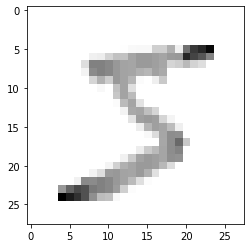

In [3]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap=plt.cm.binary)

#print(x_train[0])

In [4]:
model.save('01.model')

INFO:tensorflow:Assets written to: 01.model/assets


In [9]:
new_model = tf.keras.models.load_model('01.model')


In [10]:
predictions = new_model.predict([x_test])

In [11]:
print(predictions)

[[6.32922751e-12 2.06905292e-11 2.32842162e-10 ... 1.00000000e+00
  8.62862895e-13 3.90569603e-08]
 [2.13450757e-15 1.45282369e-10 1.00000000e+00 ... 1.30776684e-17
  2.95443702e-17 1.84422906e-21]
 [6.93164449e-12 9.99999404e-01 1.94730299e-09 ... 3.65078961e-07
  1.85993613e-07 4.72814143e-09]
 ...
 [6.21343092e-13 1.66500307e-08 8.38128785e-12 ... 3.04519494e-06
  6.14441067e-11 1.32635719e-07]
 [2.27187464e-13 4.86283249e-19 1.04387685e-16 ... 2.67386590e-13
  1.17350019e-10 1.92212985e-13]
 [3.23591778e-11 6.07204852e-14 1.92608873e-10 ... 9.05245551e-17
  7.55396613e-13 2.13169682e-14]]


In [16]:
import numpy as np
print(np.argmax(predictions[100]))

6


<function matplotlib.pyplot.show(close=None, block=None)>

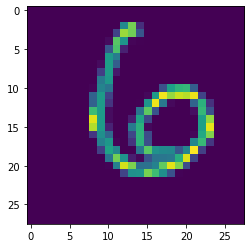

In [17]:
plt.imshow(x_test[100])
plt.show